In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [22]:
from google.colab.patches import cv2_imshow

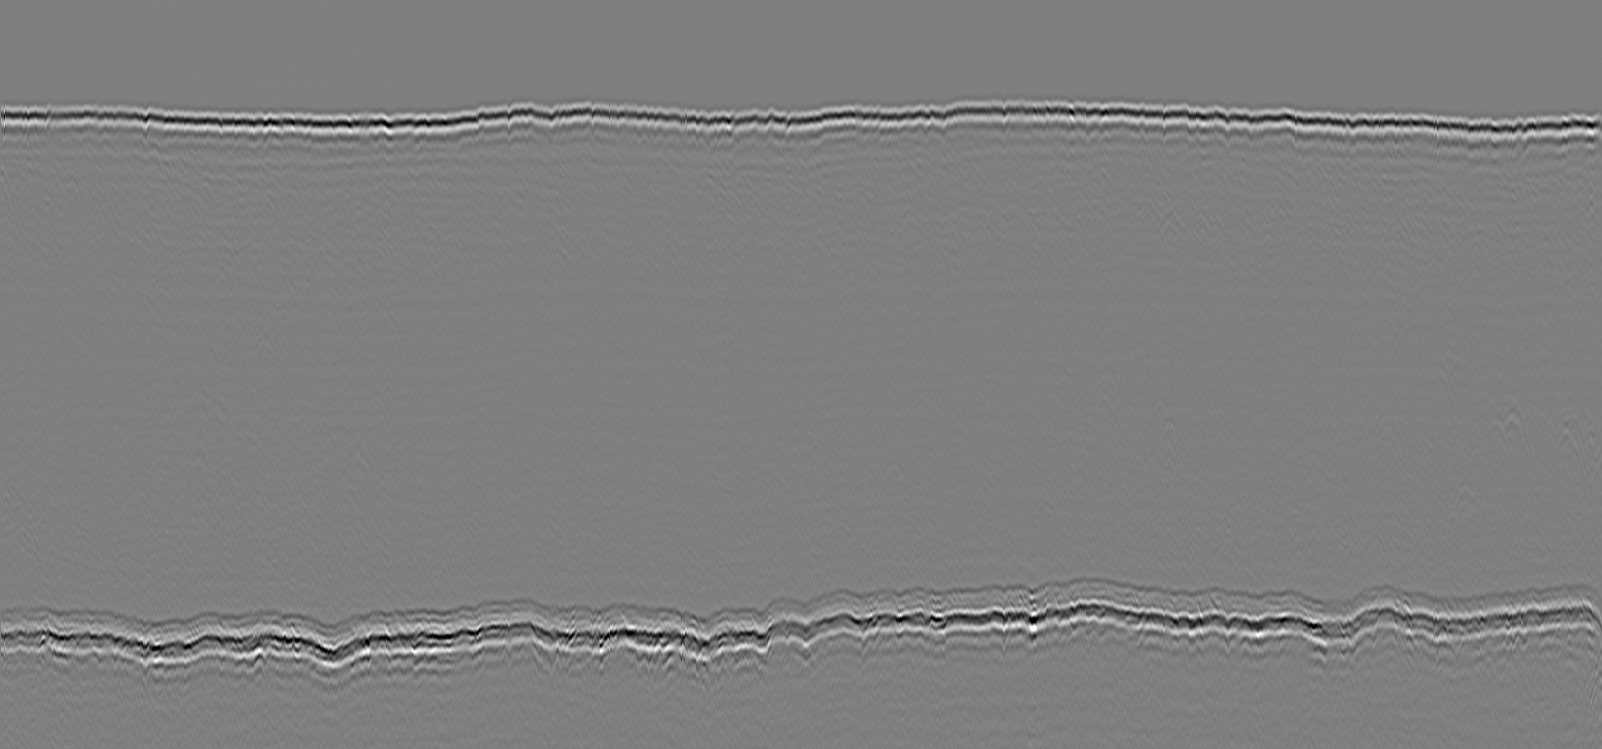

-1

In [23]:
# Read the original image
img = cv2.imread('/content/17[1].BMP')
# Display original image
cv2_imshow(img)
cv2.waitKey(0)

In [24]:
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


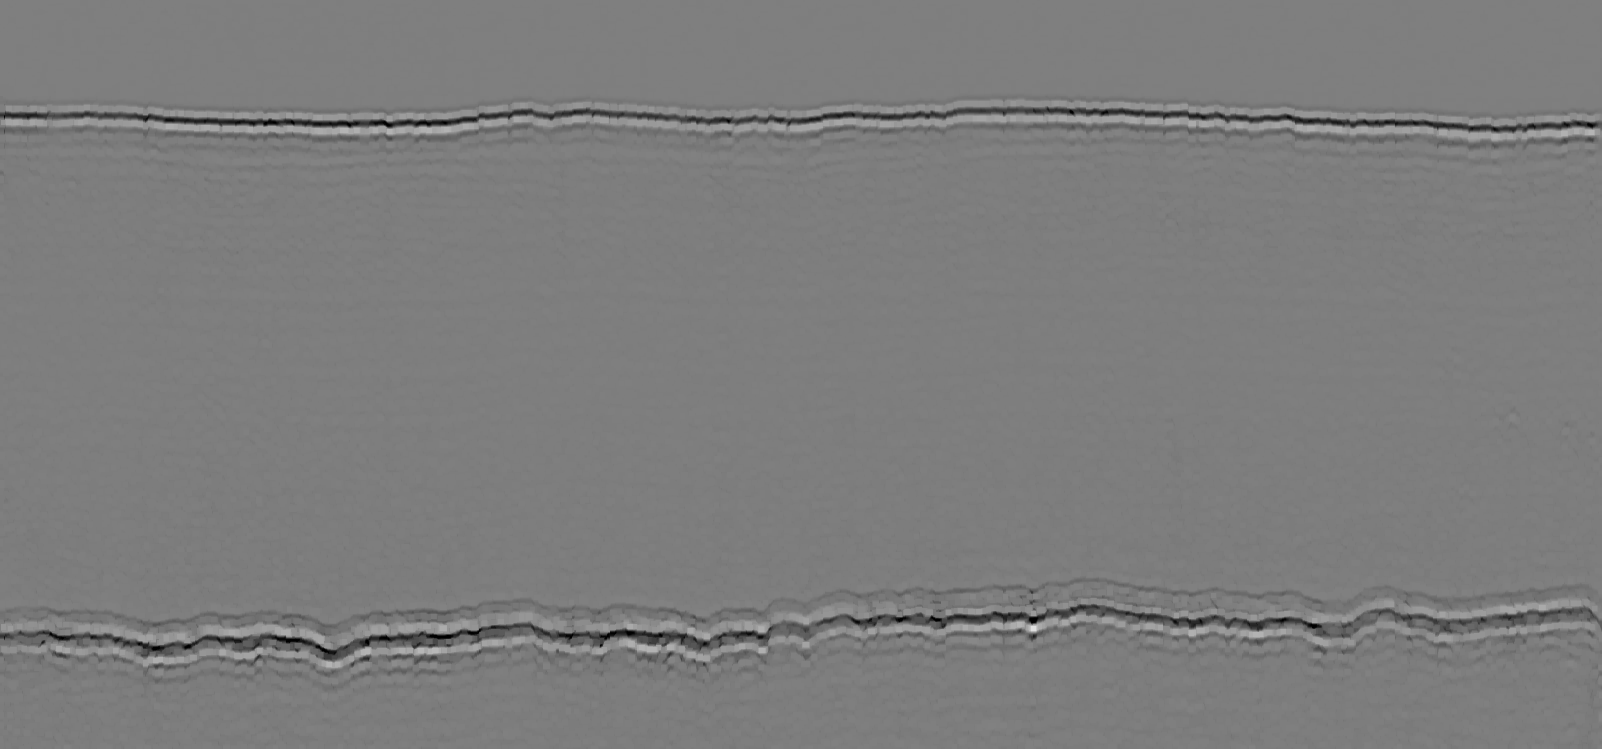

In [25]:
erosion = cv2.erode(img_gray, np.ones((5,5), np.uint8))
opening = cv2.dilate(erosion, np.ones((5,5), np.uint8))
#cv2_imshow(img_gray)
#cv2_imshow(erosion)
cv2_imshow(opening)

In [ ]:
# adaptiveThreshold of the image for better edge detection
#img_blur = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
#cv2_imshow(img_blur)
#cv2.waitKey(0)

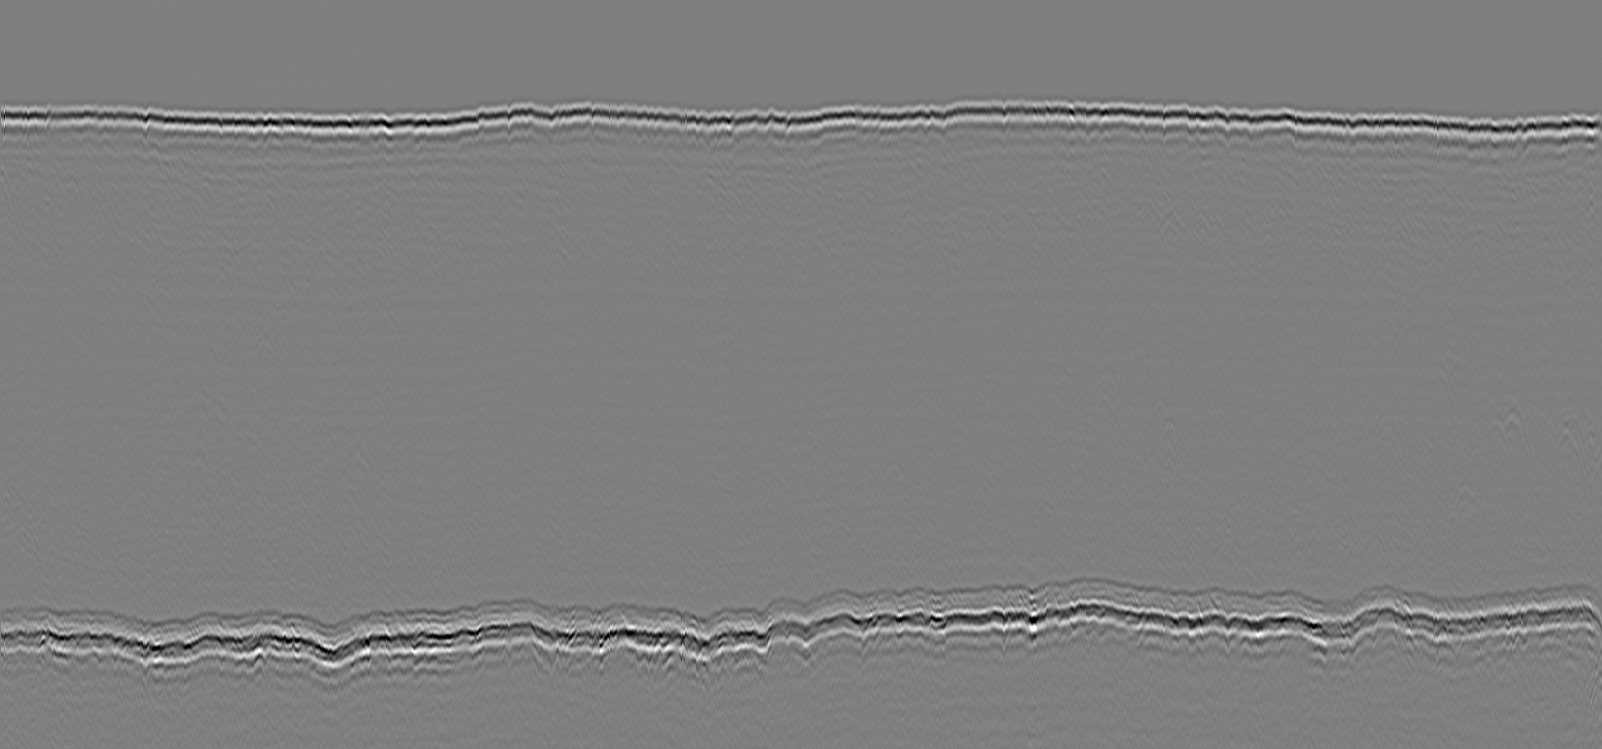

-1

In [26]:
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(opening, (3,3), 0)
cv2_imshow(img)
cv2.waitKey(0)

In [ ]:
#import numpy as np
#erosion = cv2.erode(img_gray, np.ones((3,3), np.uint8))
#cv2_imshow(erosion)

In [ ]:
# Sobel Edge Detection
#sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
#sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
#sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

In [ ]:
# Display Sobel Edge Detection Images
#cv2_imshow(sobelx)
#cv2.waitKey(0)
#cv2_imshow(sobely)
#cv2.waitKey(0)
#cv2_imshow(sobelxy)
#cv2.waitKey(0)

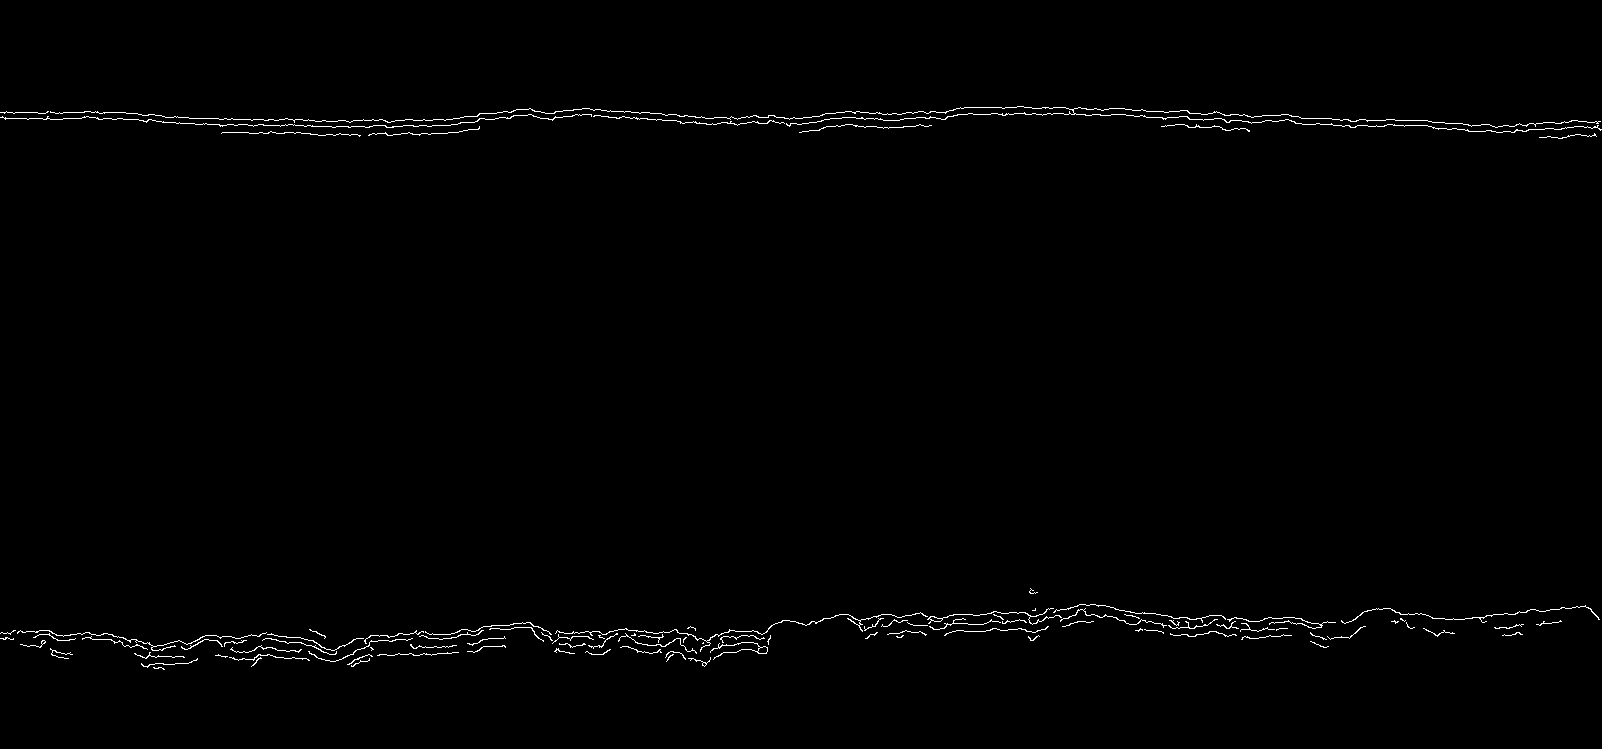

-1

In [27]:
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2_imshow( edges)
cv2.waitKey(0)

In [9]:
otsu_thresh, _ = cv2.threshold(img_blur, 0, 255, cv2.THRESH_OTSU)
triangle_thresh, _ = cv2.threshold(img_blur, 0, 255, cv2.THRESH_TRIANGLE)
manual_thresh = np.median(img_blur)

def get_range(threshold, sigma=0.33):
    return (1-sigma) * threshold, (1+sigma) * threshold

otsu_thresh = get_range(otsu_thresh)
triangle_thresh = get_range(triangle_thresh)
manual_thresh = get_range(manual_thresh)

print(f"Otsu's Threshold: {otsu_thresh} \nTriangle Threshold: {triangle_thresh} \nManual Threshold: {manual_thresh}")

Otsu's Threshold: (64.99, 129.01000000000002) 
Triangle Threshold: (79.72999999999999, 158.27) 
Manual Threshold: (84.41999999999999, 167.58)


In [10]:
import matplotlib.pyplot as plt

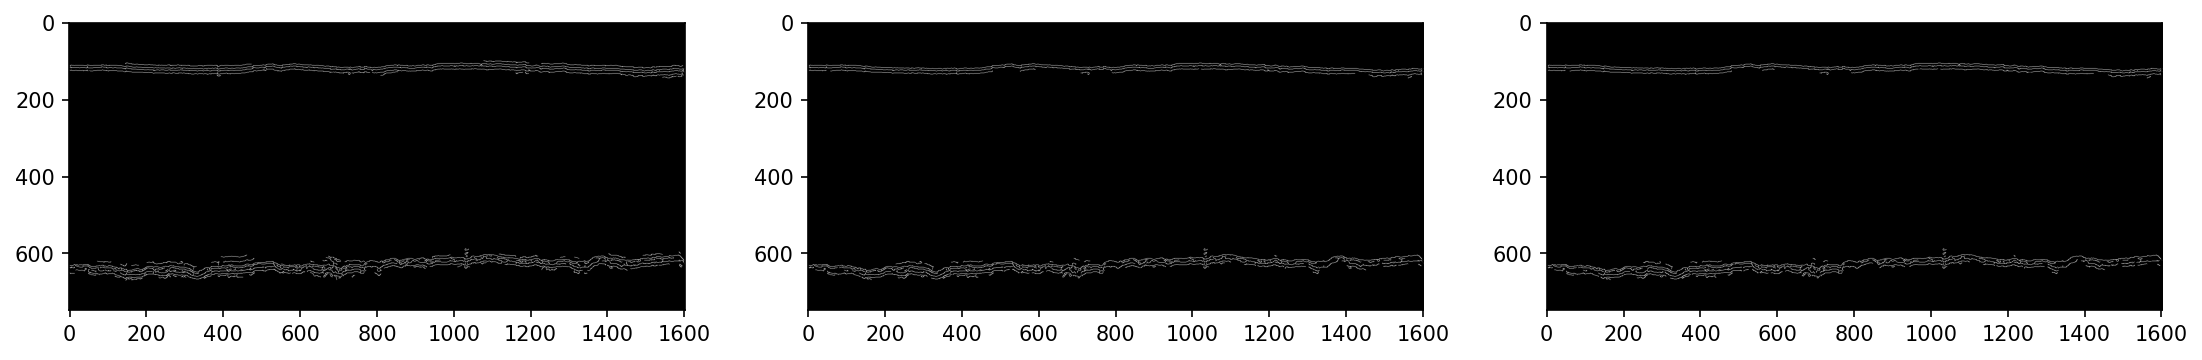

In [11]:
edge_otsu = cv2.Canny(img_blur, *otsu_thresh)
edge_triangle = cv2.Canny(img_blur, *triangle_thresh)
edge_manual = cv2.Canny(img_blur, *manual_thresh)

fig, ax = plt.subplots(1, 3, figsize=(18, 6), dpi=150)
ax[0].imshow(edge_otsu, cmap='gray')
ax[1].imshow(edge_triangle, cmap='gray')
ax[2].imshow(edge_manual, cmap='gray')

In [ ]:
invert = 255 - edges

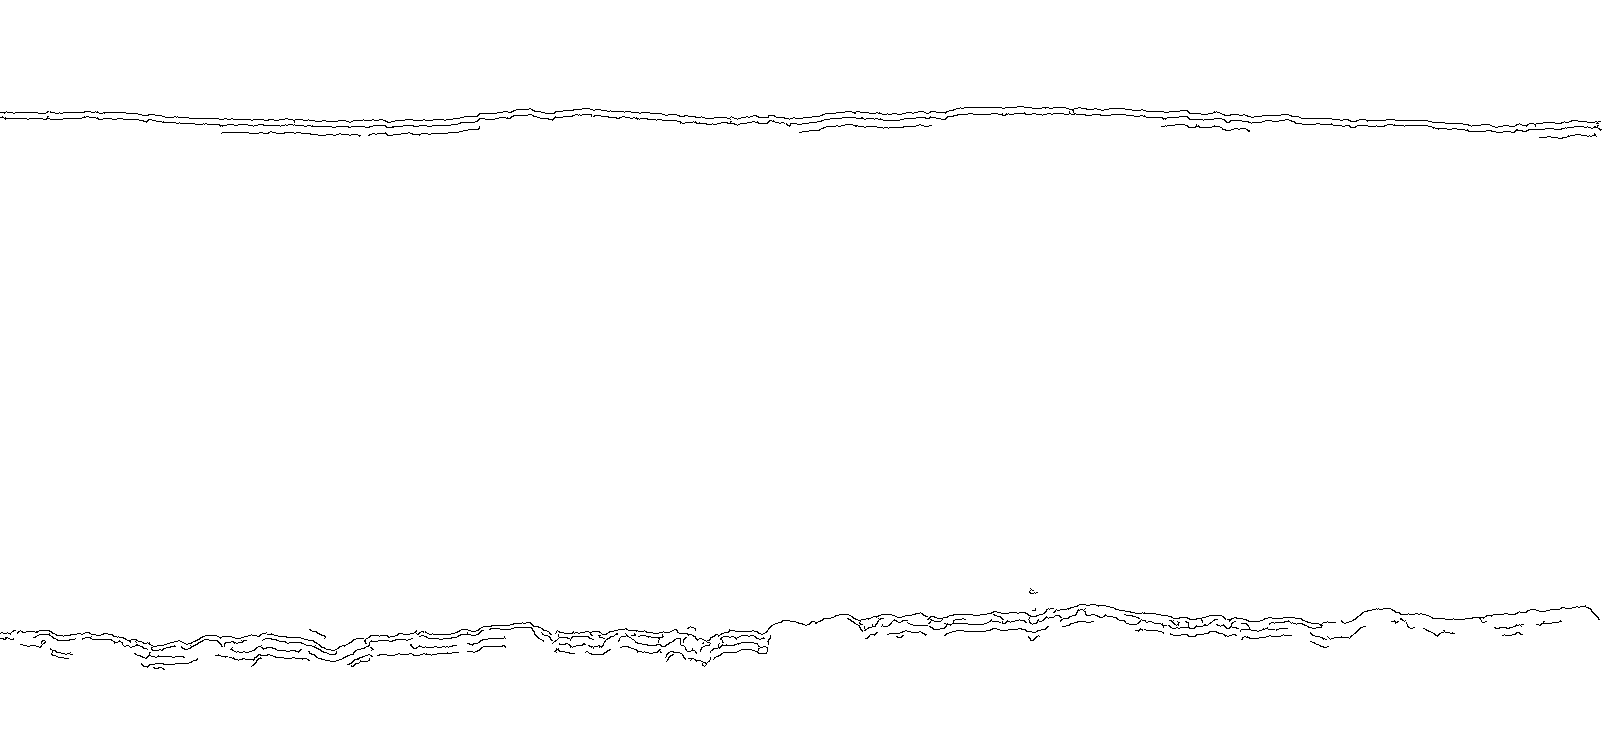

In [ ]:
cv2_imshow(invert)

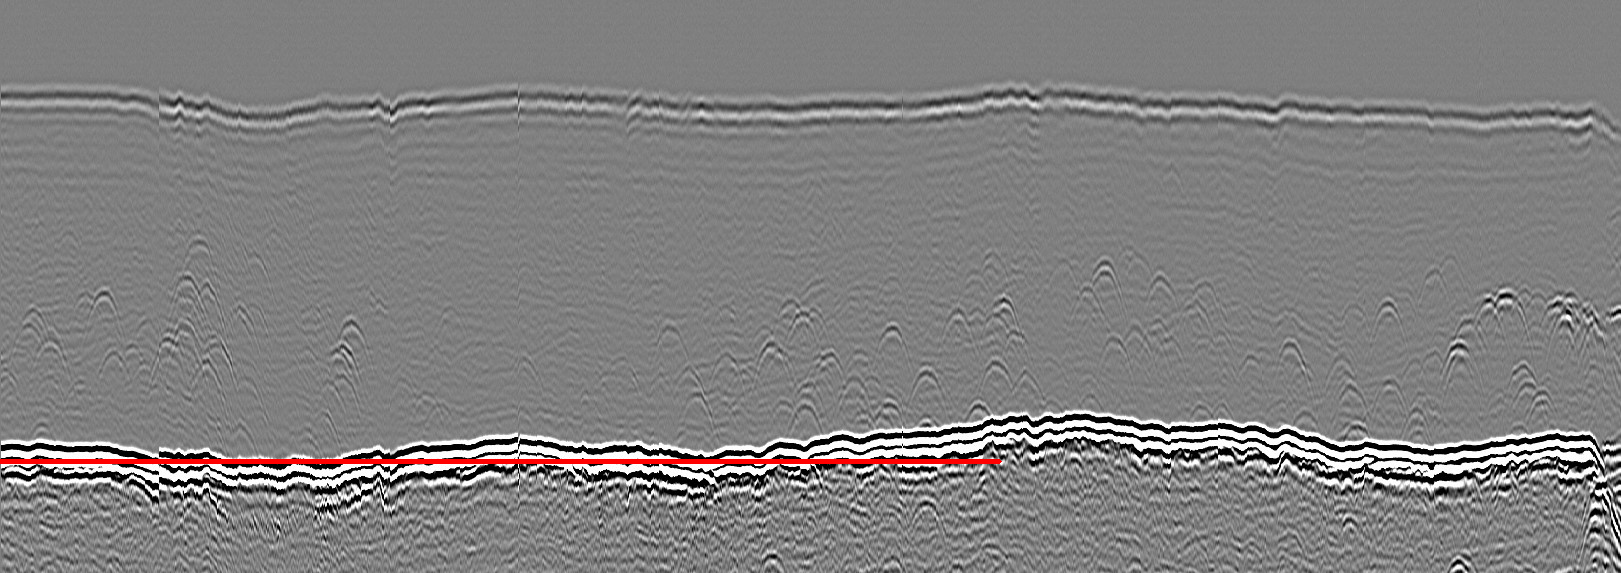

In [ ]:
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180, threshold=350)

#Draw detected lines on the original image

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 4)

#Display the result
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()